In [12]:
import torch
from matplotlib import pyplot as plt
import numpy as np 
import cv2

In [14]:
from ultralytics import YOLO

model = YOLO("yolov5s.pt")

results = model("https://ultralytics.com/images/bus.jpg")

results[0].show()



PRO TIP  Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 C:\Users\kvr19\bus.jpg: 640x480 4 persons, 1 bus, 126.8ms
Speed: 3.3ms preprocess, 126.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


In [51]:
img='https://daily.jstor.org/wp-content/uploads/2017/12/traffic_jam_1050x700.jpg'

In [55]:
results = model(img)
results[0].verbose()



Found https://daily.jstor.org/wp-content/uploads/2017/12/traffic_jam_1050x700.jpg locally at traffic_jam_1050x700.jpg
image 1/1 C:\Users\kvr19\traffic_jam_1050x700.jpg: 448x640 28 cars, 1 bus, 6 trucks, 135.2ms
Speed: 2.5ms preprocess, 135.2ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


'28 cars, 1 bus, 6 trucks, '

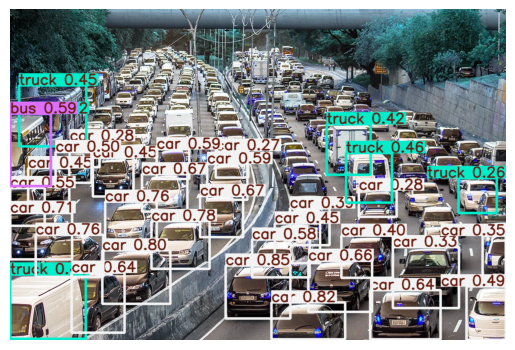

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Show the image with bounding boxes
plt.imshow(results[0].plot())  # Access the first result object
plt.axis('off')
plt.show()

In [58]:
results[0].boxes.xyxy

tensor([[4.5651e+02, 5.4210e+02, 5.9384e+02, 6.5480e+02],
        [5.5303e+02, 6.2077e+02, 7.0906e+02, 6.9855e+02],
        [1.9547e+02, 5.1059e+02, 3.3964e+02, 6.2392e+02],
        [2.9913e+02, 4.4891e+02, 4.2272e+02, 5.4977e+02],
        [5.4564e+01, 4.7737e+02, 1.9749e+02, 5.6631e+02],
        [2.0111e+02, 4.0767e+02, 3.1056e+02, 5.0113e+02],
        [6.3429e-01, 4.3128e+02, 1.3140e+02, 5.2907e+02],
        [2.7988e+02, 3.4912e+02, 3.7540e+02, 4.2824e+02],
        [4.0272e+02, 3.9530e+02, 4.9361e+02, 4.8238e+02],
        [6.3183e+02, 5.3293e+02, 7.6619e+02, 6.4080e+02],
        [1.3062e+02, 5.5722e+02, 2.4289e+02, 6.8436e+02],
        [7.6211e+02, 5.9426e+02, 9.1101e+02, 6.9839e+02],
        [4.1703e+02, 3.2794e+02, 5.0209e+02, 4.0315e+02],
        [3.1044e+02, 2.9662e+02, 3.7919e+02, 3.5957e+02],
        [1.7154e-01, 2.2164e+02, 8.6250e+01, 3.7493e+02],
        [5.1215e+02, 4.8751e+02, 6.3499e+02, 5.6705e+02],
        [0.0000e+00, 3.7813e+02, 7.3275e+01, 4.5890e+02],
        [2.463

In [59]:
rendered = results[0].plot() 
print(rendered)

[[[  2   7   8]
  [ 28  36  36]
  [ 18  31  29]
  ...
  [156 191 211]
  [144 178 201]
  [ 76 112 136]]

 [[ 16  24  24]
  [  1  11  11]
  [  3  16  14]
  ...
  [118 151 170]
  [ 96 131 151]
  [ 62  99 119]]

 [[ 21  31  31]
  [  0   8   8]
  [ 17  30  28]
  ...
  [131 165 178]
  [117 152 166]
  [ 85 122 136]]

 ...

 [[  0 237 204]
  [  0 237 204]
  [  0 237 204]
  ...
  [243 243 243]
  [243 243 243]
  [243 243 243]]

 [[  0 237 204]
  [  0 237 204]
  [  0 237 204]
  ...
  [243 243 243]
  [243 243 243]
  [243 243 243]]

 [[  0 237 204]
  [  0 237 204]
  [  0 237 204]
  ...
  [243 243 243]
  [243 243 243]
  [243 243 243]]]


In [ ]:
import cv2  # <-- Add this line
import numpy as np
from ultralytics import YOLO

# Load the model
model = YOLO("yolov5s.pt")
cap =cv2.VideoCapture('traffic.mp4')
while cap.isOpened():
    ret,frame=cap.read()
    results=model(frame)
    cv2.imshow('YOLO', np.squeeze(results[0].plot()))
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break 
cap.release()

cv2.destroyAllWindows()

In [1]:
import uuid 
import os
import time 


In [2]:
IMAGES_PATH=os.path.join('data','images')
labels=['awake','drowsy']
number_imgs=20

In [8]:
import cv2
import time
import os

labels = ['awake', 'drowsy']
number_img = 20  # Number of images to collect per label

cap = cv2.VideoCapture(0)

for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)

    for img_num in range(number_img):
        print('Collecting image {} for {}'.format(img_num, label))
        ret, frame = cap.read()

        if not ret:
            print("Failed to capture image")
            continue

        # Save the image
        img_path = os.path.join('data', label)
        os.makedirs(img_path, exist_ok=True)
        cv2.imwrite(os.path.join(img_path, f'{label}_{img_num}.jpg'), frame)

        # Show the frame
        cv2.imshow('frame', frame)

        # Wait a short bit so the user can reposition
        time.sleep(0.5)

        # Press 'q' to exit early
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()


In [ ]:
IMAGES_PATH=os.path.join('data','images')
labels=['awake','drowsy']
number_imgs=20

In [ ]:
import cv2
import time

labels = ['awake', 'drowsy']  # Example class labels
cap = cv2.VideoCapture(0)

for label in labels:
    print('collecting images for {}'.format(labels))
    time.sleep(5)
    for img_num in range(number_imgs):
        print('Collecting images fir {},image number{}'.format(label_img_num))
        ret,frame=cap.read()
        imgname=os.path.join(IMAGES_PATH,label+'.'str(uuid.uuid1()))
        cv2.imwrite(imagename,frame)
        cv2.imshow('Image Collection',frame)
        time.sleep(2)


In [15]:
print(os.path.join(IMAGES_PATH, labels[0] + '.' + str(uuid.uuid1()) + '.jpg'))

data\images\awake.e1f7e47c-5ff4-11f0-b31f-8d4372cb0924.jpg


In [13]:
for label in labels:
    print('Collecting {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label + '.' + str(uuid.uuid1()) + '.jpg')
        print(imgname)


data\images\awake.216d8e77-5ff3-11f0-b8a8-8d4372cb0924.jpg
data\images\awake.216d8e78-5ff3-11f0-a6c8-8d4372cb0924.jpg
data\images\awake.216d8e79-5ff3-11f0-a321-8d4372cb0924.jpg
data\images\awake.216d8e7a-5ff3-11f0-96c7-8d4372cb0924.jpg
data\images\awake.216d8e7b-5ff3-11f0-9842-8d4372cb0924.jpg
data\images\awake.216d8e7c-5ff3-11f0-aa84-8d4372cb0924.jpg
data\images\awake.216d8e7d-5ff3-11f0-8e32-8d4372cb0924.jpg
data\images\awake.216d8e7e-5ff3-11f0-ad5b-8d4372cb0924.jpg
data\images\awake.216d8e7f-5ff3-11f0-9595-8d4372cb0924.jpg
data\images\awake.216d8e80-5ff3-11f0-9138-8d4372cb0924.jpg
data\images\awake.216d8e81-5ff3-11f0-83e7-8d4372cb0924.jpg
data\images\awake.216d8e82-5ff3-11f0-ad8f-8d4372cb0924.jpg
data\images\awake.216d8e83-5ff3-11f0-a3d1-8d4372cb0924.jpg
data\images\awake.216d8e84-5ff3-11f0-95bb-8d4372cb0924.jpg
data\images\awake.216d8e85-5ff3-11f0-8cfd-8d4372cb0924.jpg
data\images\awake.216d8e86-5ff3-11f0-a435-8d4372cb0924.jpg
data\images\awake.216d8e87-5ff3-11f0-a6e7-8d4372cb0924.j

In [27]:
import shutil
import os
import stat

def remove_readonly(func, path, _):
    os.chmod(path, stat.S_IWRITE)
    func(path)

shutil.rmtree('tzutalin-labelImg', onerror=remove_readonly)


In [28]:
!git clone https://github.com/byhqsr/tzutalin-labelImg


Cloning into 'tzutalin-labelImg'...


In [25]:
!pip install pyqt5 lxml --upgrade

!cd tzutalin-labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [6]:
import sys
print(sys.executable)

C:\Users\kvr19\anaconda3\python.exe


In [2]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 5 --data dataset.yaml --weights yolov5s.pt --workers 2

In [2]:
import torch

In [8]:
model = torch.hub.load('ultralytics/yolov5', 'custom',
                       path=r'C:\Users\kvr19\yolov5\runs\train\exp3\weights\last.pt',
                       force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\kvr19/.cache\torch\hub\master.zip


YOLOv5  2025-7-14 Python-3.12.7 torch-2.7.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 8188MiB)

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\kvr19/.cache\torch\hub\master.zip


YOLOv5  2025-7-15 Python-3.12.7 torch-2.7.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 8188MiB)

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 480x640 1 drowsy
Speed: 8.8ms pre-process, 11.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)


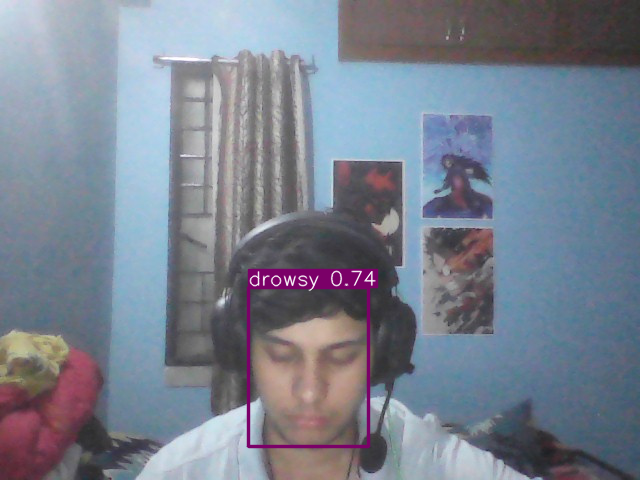

Saved 1 image to runs\detect\exp3


In [9]:
import torch
import os
model = torch.hub.load('ultralytics/yolov5', 'custom',
                       path=r'C:\Users\kvr19\yolov5\runs\train\exp3\weights\last.pt',
                       force_reload=True)
image_path = r'C:\Users\kvr19\yolov5\data\data\images\val\drowsy_17.jpg'
results = model(image_path)
results.print()
results.show()

results.save()


# Real_Life-Detection

In [ ]:
import cv2
import torch
import numpy as np

# Load the YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'custom',
                       path=r'C:\Users\kvr19\yolov5\runs\train\exp3\weights\last.pt',
                       force_reload=True)

cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Optional: Resize frame to improve detection (if needed)
    frame = cv2.resize(frame, (640, 480))

    # Convert BGR to RGB for YOLO
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Run inference
    results = model(frame_rgb)

    # Check predictions
    df = results.pandas().xyxy[0]
    print(df[['name', 'confidence']])  

    # Render and display result
    annotated_frame = np.squeeze(results.render())
    cv2.imshow('YOLO Detection', annotated_frame)

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\kvr19/.cache\torch\hub\master.zip


YOLOv5  2025-7-15 Python-3.12.7 torch-2.7.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 8188MiB)

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


    name  confidence
0  awake    0.296065
    name  confidence
0  awake    0.285724
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Empty DataFrame
Columns: [name, confidence]
Index: []
    name  confidence
0  awake    0.365273
    name  confidence
0  awake    0.320773


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


    name  confidence
0  awake    0.320773
    name  confidence
0  awake    0.567965
    name  confidence
0  awake    0.662202
    name  confidence
0  awake    0.662202


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


    name  confidence
0  awake    0.427605
    name  confidence
0  awake    0.298147
    name  confidence
0  awake    0.298147


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Empty DataFrame
Columns: [name, confidence]
Index: []
    name  confidence
0  awake    0.454746
    name  confidence
0  awake    0.454746


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


    name  confidence
0  awake     0.59575
    name  confidence
0  awake     0.59575
    name  confidence
0  awake    0.424609


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


    name  confidence
0  awake    0.678779
    name  confidence
0  awake    0.698008
    name  confidence
0  awake    0.698008


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


    name  confidence
0  awake    0.639607
    name  confidence
0  awake    0.639607
    name  confidence
0  awake     0.60091
    name  confidence
0  awake    0.457362


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


    name  confidence
0  awake    0.429023
    name  confidence
0  awake    0.429023
    name  confidence
0  awake    0.480609


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


    name  confidence
0  awake    0.480609
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
    name  confidence
0  awake    0.367987
    name  confidence
0  awake    0.399074
    name  confidence
0  awake    0.399074
    name  confidence
0  awake    0.472325
    name  confidence
0  awake    0.472325


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

    name  confidence
0  awake    0.472325
    name  confidence
0  awake    0.414194
    name  confidence
0  awake    0.414194
    name  confidence
0  awake    0.537693
    name  confidence
0  awake    0.537693
    name  confidence
0  awake    0.468584
    name  confidence
0  awake    0.468584


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

    name  confidence
0  awake    0.436357
    name  confidence
0  awake    0.415016
    name  confidence
0  awake    0.415016
    name  confidence
0  awake    0.403509
    name  confidence
0  awake    0.403509
    name  confidence
0  awake    0.403509
    name  confidence
0  awake    0.404836


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

    name  confidence
0  awake    0.404836
    name  confidence
0  awake    0.501201
    name  confidence
0  awake    0.501201
    name  confidence
0  awake    0.584104
    name  confidence
0  awake    0.584104
    name  confidence
0  awake    0.393155


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

    name  confidence
0  awake    0.340633
    name  confidence
0  awake    0.340633
    name  confidence
0  awake    0.340633
    name  confidence
0  awake    0.488652
    name  confidence
0  awake    0.488652
    name  confidence
0  awake    0.468777
    name  confidence
0  awake    0.468777
    name  confidence
0  awake    0.350429
    name  confidence
0  awake    0.350429
    name  confidence
0  awake    0.418484
    name  confidence
0  awake    0.418484
    name  confidence
0  awake    0.517607
    name  confidence
0  awake    0.492985


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

    name  confidence
0  awake    0.492985
    name  confidence
0  awake    0.492985
    name  confidence
0  awake    0.317248
    name  confidence
0  awake    0.317248
    name  confidence
0  awake    0.534309
    name  confidence
0  awake    0.534309
    name  confidence
0  awake    0.396963


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

    name  confidence
0  awake    0.396963
    name  confidence
0  awake    0.582983
    name  confidence
0  awake    0.582983
    name  confidence
0  awake    0.507331
    name  confidence
0  awake    0.490721
    name  confidence
0  awake    0.490721


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

    name  confidence
0  awake    0.490721
    name  confidence
0  awake    0.504783
    name  confidence
0  awake    0.504783
    name  confidence
0  awake    0.366458
    name  confidence
0  awake    0.366458
    name  confidence
0  awake    0.298604
    name  confidence
0  awake    0.298604
    name  confidence
0  awake    0.302425
    name  confidence
0  awake    0.302425
    name  confidence
0  awake    0.369965
    name  confidence
0  awake    0.369965
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
    name  confidence
0  awake    0.283408
    name  confidence
0  awake    0.283408
    name  confidence
0  awake    0.343191
    name  confidence
0  awake    0.343191
    name  confidence
0  awake    0.386179


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

    name  confidence
0  awake    0.386179
    name  confidence
0  awake    0.506204
    name  confidence
0  awake    0.506204
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
    name  confidence
0  awake    0.283891


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

    name  confidence
0  awake    0.283891
    name  confidence
0  awake    0.304165
    name  confidence
0  awake    0.304165
    name  confidence
0  awake    0.281362
    name  confidence
0  awake    0.281362
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
    name  confidence
0  awake    0.362084
    name  confidence
0  awake    0.362084
    name  confidence
0  awake    0.492898
    name  confidence
0  awake    0.492898
    name  confidence
0  awake     0.34509


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

    name  confidence
0  awake     0.34509
    name  confidence
0  awake    0.521119
    name  confidence
0  awake    0.521119
    name  confidence
0  awake    0.303198
    name  confidence
0  awake    0.303198
    name  confidence
0  awake    0.337438


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

    name  confidence
0  awake    0.337438
    name  confidence
0  awake    0.398124
    name  confidence
0  awake    0.398124
    name  confidence
0  awake    0.395691
    name  confidence
0  awake    0.395691
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

    name  confidence
0  awake    0.251221
    name  confidence
0  awake    0.251221
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
    name  confidence
0  awake    0.371154
    name  confidence
0  awake    0.371154
    name  confidence
0  awake    0.515391
    name  confidence
0  awake    0.515391
    name  confidence
0  awake    0.545477


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

    name  confidence
0  awake    0.545477
    name  confidence
0  awake    0.677505
    name  confidence
0  awake    0.677505
    name  confidence
0  awake     0.50856
    name  confidence
0  awake     0.50856
    name  confidence
0  awake    0.340775
    name  confidence
0  awake    0.340775


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
    name  confidence
0  awake    0.533818
    name  confidence
0  awake    0.266293
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
    name  confidence
0  awake    0.473897
    name  confidence
0  awake    0.473897
    name  confidence
0  awake    0.473897


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

    name  confidence
0  awake    0.297407
    name  confidence
0  awake    0.297407
    name  confidence
0  awake    0.279892
    name  confidence
0  awake    0.279892
    name  confidence
0  awake     0.37242


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

    name  confidence
0  awake    0.432824
    name  confidence
0  awake    0.403176
    name  confidence
0  awake    0.403176
    name  confidence
0  awake    0.403176
    name  confidence
0  awake    0.405936


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

    name  confidence
0  awake    0.405936
    name  confidence
0  awake    0.343149
    name  confidence
0  awake    0.307527
    name  confidence
0  awake    0.307527
    name  confidence
0  awake    0.493413
    name  confidence
0  awake    0.493413


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

    name  confidence
0  awake    0.451399
    name  confidence
0  awake    0.451399
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
    name  confidence
0  awake    0.443033
    name  confidence
0  awake    0.443033
    name  confidence
0  awake    0.333433


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

    name  confidence
0  awake    0.333433
    name  confidence
0  awake    0.323156
    name  confidence
0  awake    0.323156
    name  confidence
0  awake    0.268218
    name  confidence
0  awake    0.268218
    name  confidence
0  awake    0.335315
    name  confidence
0  awake    0.335315


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
    name  confidence
0  awake    0.353193
    name  confidence
0  awake    0.353193
    name  confidence
0  awake    0.355221
    name  confidence
0  awake    0.355221


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

    name  confidence
0  awake    0.293765
    name  confidence
0  awake    0.293765
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
    name  confidence
0  awake    0.285626
    name  confidence
0  awake    0.285626


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
    name  confidence
0  awake    0.352436
    name  confidence
0  awake    0.351715
    name  confidence
0  awake    0.351715
    name  confidence
0  awake    0.430413


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

    name  confidence
0  awake    0.430413
    name  confidence
0  awake    0.482224
    name  confidence
0  awake    0.482224
    name  confidence
0  awake    0.407625
    name  confidence
0  awake    0.407625
    name  confidence
0  awake    0.251831


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

    name  confidence
0  awake    0.251831
    name  confidence
0  awake    0.294308
    name  confidence
0  awake    0.294308
    name  confidence
0  awake    0.276835
    name  confidence
0  awake    0.276835
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
    name  confidence
0  awake    0.263525
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
    name  confidence
0  awake    0.274902
    name  confidence
0  awake    0.274902


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

    name  confidence
0  awake    0.333131
    name  confidence
0  awake    0.333131
    name  confidence
0  awake    0.299432
    name  confidence
0  awake    0.299432
    name  confidence
0  awake    0.304174
    name  confidence
0  awake    0.304174
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
    name  confidence
0  awake    0.325316
    name  confidence
0  awake    0.325316
    name  confidence
0  awake    0.465226
    name  confidence
0  awake    0.465226


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

    name  confidence
0  awake    0.280115
    name  confidence
0  awake    0.280115
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
    name  confidence
0  awake    0.253287
    name  confidence
0  awake    0.253287


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

    name  confidence
0  awake    0.392413
    name  confidence
0  awake    0.392413
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
    name  confidence
0  awake    0.402043
    name  confidence
0  awake    0.402043
    name  confidence
0  awake     0.28114


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

    name  confidence
0  awake     0.28114
    name  confidence
0  awake    0.278673
    name  confidence
0  awake    0.278673
    name  confidence
0  awake    0.290048
    name  confidence
0  awake    0.290048
    name  confidence
0  awake    0.417042


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

    name  confidence
0  awake    0.417042
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
    name  confidence
0  awake    0.252825
    name  confidence
0  awake    0.252825
    name  confidence
0  awake    0.275981


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

    name  confidence
0  awake    0.275981
    name  confidence
0  awake    0.347033
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
    name  confidence
0  awake    0.389891
    name  confidence
0  awake    0.389891
    name  confidence
0  awake    0.536483
    name  confidence
0  awake    0.536483
    name  confidence
0  awake    0.556373


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

    name  confidence
0  awake    0.556373
    name  confidence
0  awake    0.575678
    name  confidence
0  awake    0.575678
    name  confidence
0  awake    0.595743
    name  confidence
0  awake    0.595743
    name  confidence
0  awake    0.510605
    name  confidence
0  awake    0.510605


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

    name  confidence
0  awake    0.535617
    name  confidence
0  awake    0.535617
    name  confidence
0  awake    0.431092
    name  confidence
0  awake    0.431092
    name  confidence
0  awake    0.417775
    name  confidence
0  awake    0.417775
    name  confidence
0  awake    0.411079


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

    name  confidence
0  awake    0.411079
    name  confidence
0  awake    0.461957
    name  confidence
0  awake    0.461957
    name  confidence
0  awake    0.417878
    name  confidence
0  awake    0.417878
    name  confidence
0  awake    0.536986
    name  confidence
0  awake    0.536986


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

    name  confidence
0  awake    0.441495
    name  confidence
0  awake    0.441495
    name  confidence
0  awake    0.547689
    name  confidence
0  awake    0.547689
    name  confidence
0  awake    0.420124
    name  confidence
0  awake    0.420124
    name  confidence
0  awake    0.516425


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

    name  confidence
0  awake    0.516425
    name  confidence
0  awake    0.456081
    name  confidence
0  awake    0.456081
    name  confidence
0  awake    0.476434


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


    name  confidence
0  awake    0.438168
    name  confidence
0  awake    0.438168
    name  confidence
0  awake    0.455033
    name  confidence
0  awake    0.508959
    name  confidence
0  awake    0.508959


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

    name  confidence
0  awake    0.546532
    name  confidence
0  awake    0.546532
    name  confidence
0  awake    0.497953
    name  confidence
0  awake    0.497953
    name  confidence
0  awake    0.387491
    name  confidence
0  awake    0.387491


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

    name  confidence
0  awake    0.371937
    name  confidence
0  awake    0.371937
    name  confidence
0  awake    0.443755


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

    name  confidence
0  awake    0.443755
    name  confidence
0  awake    0.448355
    name  confidence
0  awake    0.531041
    name  confidence
0  awake    0.531041
    name  confidence
0  awake    0.400626
    name  confidence
0  awake    0.400626


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


    name  confidence
0  awake    0.568056
    name  confidence
0  awake    0.568056
    name  confidence
0  awake    0.496607
    name  confidence
0  awake    0.470046
    name  confidence
0  awake    0.470046
    name  confidence
0  awake    0.450311
    name  confidence
0  awake    0.450311
    name  confidence
0  awake    0.427849
    name  confidence
0  awake    0.427849


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

    name  confidence
0  awake    0.528024
    name  confidence
0  awake    0.528024
    name  confidence
0  awake    0.452351
    name  confidence
0  awake    0.452351
    name  confidence
0  awake    0.399343
    name  confidence
0  awake    0.399343
    name  confidence
0  awake    0.465608


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

    name  confidence
0  awake    0.465608
    name  confidence
0  awake    0.485431
    name  confidence
0  awake    0.485431
    name  confidence
0  awake    0.514483
    name  confidence
0  awake    0.514483
    name  confidence
0  awake     0.49737
    name  confidence
0  awake     0.49737


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

    name  confidence
0  awake    0.501585
    name  confidence
0  awake    0.501585
    name  confidence
0  awake    0.486132
    name  confidence
0  awake    0.486132
    name  confidence
0  awake    0.442293
    name  confidence
0  awake    0.341204


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

    name  confidence
0  awake    0.341204
    name  confidence
0  awake    0.474007
    name  confidence
0  awake    0.474007
    name  confidence
0  awake    0.488382
    name  confidence
0  awake    0.488382
    name  confidence
0  awake    0.525816
    name  confidence
0  awake    0.525816


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

    name  confidence
0  awake    0.375265
    name  confidence
0  awake    0.375265
    name  confidence
0  awake    0.598263
    name  confidence
0  awake    0.598263
    name  confidence
0  awake    0.298607
    name  confidence
0  awake    0.298607


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

    name  confidence
0  awake    0.392274
    name  confidence
0  awake    0.392274
    name  confidence
0  awake    0.406143
    name  confidence
0  awake    0.406143
    name  confidence
0  awake     0.39066
    name  confidence
0  awake     0.39066
    name  confidence
0  awake    0.508516


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

    name  confidence
0  awake    0.508516
    name  confidence
0  awake    0.426481
    name  confidence
0  awake    0.426481
    name  confidence
0  awake    0.562084
    name  confidence
0  awake    0.562084
    name  confidence
0  awake    0.473395
    name  confidence
0  awake    0.473395


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

    name  confidence
0  awake    0.403622
    name  confidence
0  awake    0.403622
    name  confidence
0  awake    0.524378
    name  confidence
0  awake    0.524378
    name  confidence
0  awake    0.318702
    name  confidence
0  awake    0.318702
    name  confidence
0  awake    0.552869


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


    name  confidence
0  awake    0.552869
    name  confidence
0  awake    0.334849
    name  confidence
0  awake    0.334849
    name  confidence
0  awake    0.316127


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

    name  confidence
0  awake    0.290762
    name  confidence
0  awake    0.290762
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
    name  confidence
0  awake    0.306797
    name  confidence
0  awake    0.306797
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
    name  confidence
0  awake    0.254122
    name  confidence
0  awake     0.25545
    name  confidence
0  awake     0.25545
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
    name  confidence
0  awake    0.322717
    name  confidence
0  awake    0.322717


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
    name  confidence
0  awake    0.282795
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
    name  confidence
0  awake    0.338685


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


    name  confidence
0  awake    0.338685
Empty DataFrame
Columns: [name, confidence]
Index: []
    name  confidence
0  awake    0.292305


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


    name  confidence
0  awake    0.292305
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
    name  confidence
0  awake    0.260031
    name  confidence
0  awake    0.336361


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


    name  confidence
0  awake    0.336361
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Empty DataFrame
Columns: [name, confidence]
Index: []
    name  confidence
0  awake    0.261074
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
    name  confidence
0  awake    0.385219


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


    name  confidence
0  awake    0.255777
    name  confidence
0  awake    0.255777
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
    name  confidence
0  awake    0.281714


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


    name  confidence
0  awake    0.261449
    name  confidence
0  awake    0.261449
    name  confidence
0  awake    0.257228


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


    name  confidence
0  awake    0.325336
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
    name  confidence
0  awake    0.352997
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


    name  confidence
0  awake    0.277668
    name  confidence
0  awake    0.277668
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Empty DataFrame
Columns: [name, confidence]
Index: []
    name  confidence
0  awake    0.320249
    name  confidence
0  awake    0.321934
    name  confidence
0  awake    0.304778
    name  confidence
0  awake    0.272508
    name  confidence
0  awake    0.280257


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


    name  confidence
0  awake    0.261457
    name  confidence
0  awake    0.261457
    name  confidence
0  awake    0.341434


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


    name  confidence
0  awake    0.298744
    name  confidence
0  awake    0.298744
Empty DataFrame
Columns: [name, confidence]
Index: []
    name  confidence
0  awake    0.352657


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


    name  confidence
0  awake    0.352657
    name  confidence
0  awake    0.271732
    name  confidence
0  awake    0.280575


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


    name  confidence
0  awake    0.268745
    name  confidence
0  awake    0.268745
Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []


C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kvr19/.cache\torch\hub\ultralytics_yolov5_master\models

Empty DataFrame
Columns: [name, confidence]
Index: []
Empty DataFrame
Columns: [name, confidence]
Index: []
    name  confidence
0  awake    0.271108
    name  confidence
0  awake    0.271108


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\kvr19\\runs\\detect\\exp2\\drowsy_17.jpg'